In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [2]:
levantamento = np.genfromtxt(
    'levantamento.txt', 
     dtype=([('Mcf', '<i8'), ('X', '<f8'), ('Y', '<f8')]))

In [3]:
Bx = []
By = []
Bz = []
sx = []
sy = []
sz = []
for i in levantamento['Mcf']:
    filename = 'Mcf{}.csv'.format(i)
    B = np.genfromtxt(filename, delimiter=',', usecols=(1,2,3), skip_header=1)
    B_mean = np.mean(B, axis=0)
    B_std  = np.std(B, axis=0)
    Bx.append(B_mean[0])
    By.append(B_mean[1])
    Bz.append(B_mean[2])
    sx.append(B_std[0])
    sy.append(B_std[1])
    sz.append(B_std[2])
Bx = np.array(Bx)
By = np.array(By)
Bz = np.array(Bz)
sx = np.array(sx)
sy = np.array(sy)
sz = np.array(sz)

In [4]:
Bt = np.sqrt(Bx**2 + By**2 + Bz**2)

In [5]:
st = np.sqrt((Bx*sx)**2 + (By*sy)**2 + (Bz*sz)**2)/Bt

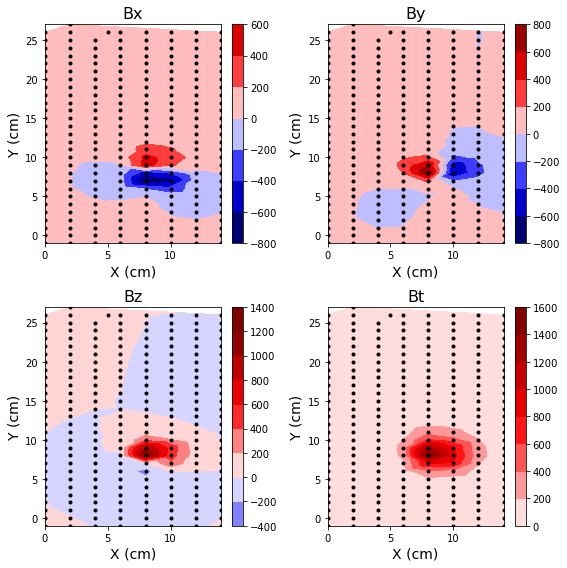

In [8]:
dados = [Bx, By, Bz, Bt]
title = ['Bx', 'By', 'Bz', 'Bt']
ranges = [np.max(np.abs(Bx)),
          np.max(np.abs(By)),
          np.max(np.abs(Bz)),
          np.max(np.abs(Bt))]

plt.figure(figsize=(8,8))

for index in range(1,5):

    plt.subplot(2,2,index)
    plt.title(title[index-1], fontsize=16)
    plt.tricontourf(levantamento['X'], levantamento['Y'], dados[index-1], 
                    cmap='seismic', vmin=-ranges[index-1], vmax=ranges[index-1])
    plt.colorbar()
    plt.plot(levantamento['X'], levantamento['Y'], 'k.')
    plt.xlabel('X (cm)', fontsize = 14)
    plt.ylabel('Y (cm)', fontsize = 14)
plt.tight_layout()
plt.show()

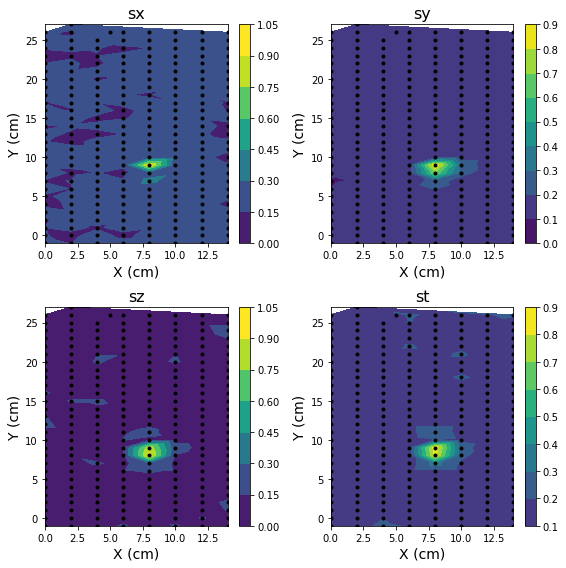

In [10]:
dados = [sx, sy, sz, st]
title = ['sx', 'sy', 'sz', 'st']
ranges = [np.max(sx),
          np.max(sy),
          np.max(sz),
          np.max(st)]

plt.figure(figsize=(8,8))

for index in range(1,5):

    plt.subplot(2,2,index)
    plt.title(title[index-1], fontsize=16)
    plt.tricontourf(levantamento['X'], levantamento['Y'], dados[index-1], 
                    cmap='viridis', vmin=0, vmax=ranges[index-1])
    plt.colorbar()
    plt.plot(levantamento['X'], levantamento['Y'], 'k.')
    plt.xlabel('X (cm)', fontsize = 14)
    plt.ylabel('Y (cm)', fontsize = 14)
plt.tight_layout()
plt.show()